# Prometheus workbook

In addition to the Python API, this library also provides several Magics to help integrate with [Jupyter](https://jupyter.org/) workbooks.

In [1]:
%matplotlib inline
import prometheus_pd.ipython.magic

## Instant queries

The `%%query` cell Magic allows evaluating instant query at a single point in time. Depending on the query, it may return a vector (`pd.Series`), matrix (`pd.DataFrame`), scalar (`np.float64`) or string (`str`).

### Usage
```
%%query prometheus_url [-t|--time <rfc3339 | unix_timestamp>] [-T|--timeout <duration>] [output]
    instant_query
```

In [2]:
%%query http://raspberrypi.lan:9090
    rate(node_cpu{mode="user"}[1m])

{cpu="cpu1",instance="localhost:9100",job="node",mode="user"}    0.011111
{cpu="cpu3",instance="localhost:9100",job="node",mode="user"}    0.016444
{cpu="cpu0",instance="localhost:9100",job="node",mode="user"}    0.019111
{cpu="cpu2",instance="localhost:9100",job="node",mode="user"}    0.007556
dtype: float64

## Range queries

The `%%query_range` cell Magic allows evaluating expression query over a range of time. It always returns a matrix (`pd.DataFrame`).

### Usage
```
%%query_range prometheus_url start end step [-T|--timeout <duration>] [output]
    range_query
```

In [3]:
%%query_range http://raspberrypi.lan:9090 2018-11-23T00:00:00Z 2018-11-24T00:00:00Z 1h
    rate(node_cpu{mode="user",cpu="cpu0"}[1m])

,"{cpu=""cpu0"",instance=""localhost:9100"",job=""node"",mode=""user""}"
2018-11-23 00:00:00,0.013778
2018-11-23 01:00:00,0.034444
2018-11-23 02:00:00,0.008444
2018-11-23 03:00:00,0.025111
2018-11-23 04:00:00,0.041556
2018-11-23 05:00:00,0.017333
2018-11-23 06:00:00,0.014222
2018-11-23 07:00:00,0.017556
2018-11-23 08:00:00,0.048444
2018-11-23 09:00:00,0.011556


If the `output` parameter is provided then the results will be assigned to a variable of that name.

In [4]:
%%query_range http://raspberrypi.lan:9090 2018-11-24T00:00:00Z 2018-11-24T01:00:00Z 1m data
    rate(node_cpu{mode="user"}[1m])

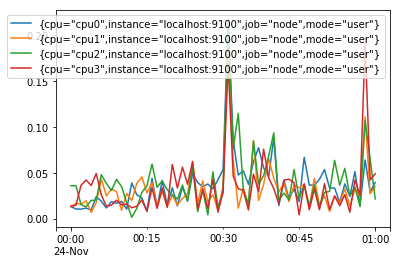

In [5]:
data.plot()

The `query_range_now` function is like `query_range` except that it's relative to the current time. It's useful for building real-time graphs.

In [33]:
%%query_range_now http://raspberrypi.lan:9090 12h 1m data
    rate(node_cpu{mode="user"}[1m])

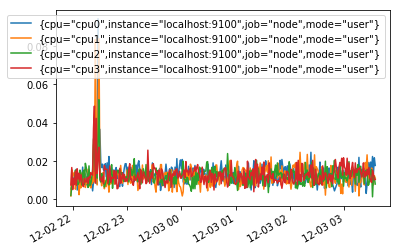

In [34]:
data.plot()

For more details see the documentation on Prometheus' [HTTP API](https://prometheus.io/docs/prometheus/latest/querying/api/).